<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/features_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import auth
from google.colab import drive

In [55]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting

In [57]:

#!ls /content/drive/MyDrive/


In [58]:

# # Load data
# df1 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_10.2.csv")
# df2 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_14.2.csv")
# df3 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_15.2.csv")
# df4 = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_20.1.csv")


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


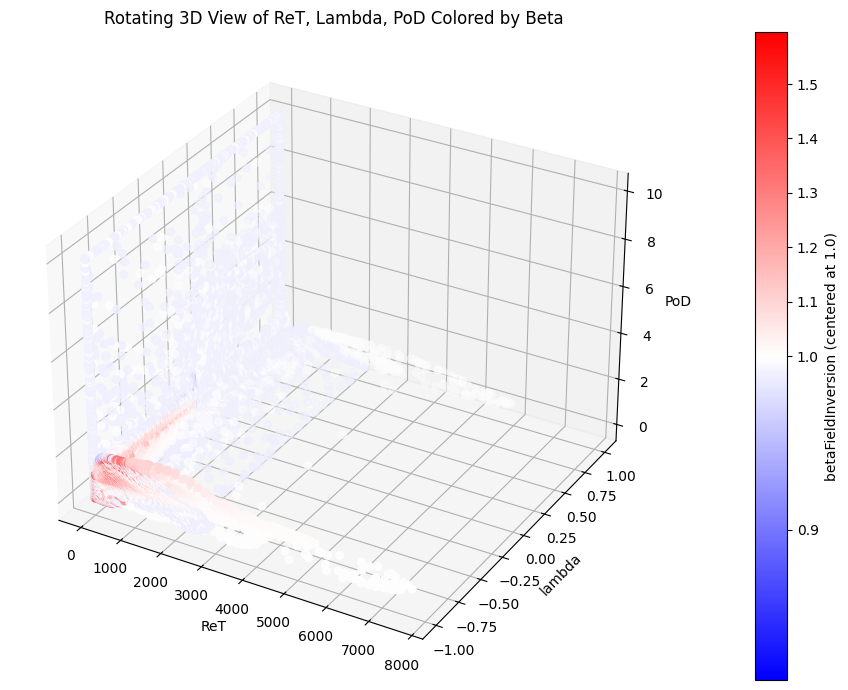

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# === Load all datasets ===
paths = [
    "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
    "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
    "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
    "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
]

frames = []
for path in paths:
    item = pd.read_csv(path)

    # Extract arrays
    xc = np.array(item['x'])
    yc = np.array(item['y'])
    b = np.array(item['betaFieldInversion'])
    ff1 = np.array(item['ReV'])
    ff2 = np.array(item['ReT'])
    ff3 = np.array(item['SoV'])
    ff4 = np.array(item['lambda'])
    ff5 = np.array(item['PoD'])

    # Filter by spatial bounds
    x1, y1, b1, f1, f2, f3, f4, f5 = [[] for _ in range(8)]
    for i in range(len(xc)):
        if -0.2 <= xc[i] <= 1.0 and -0.15 <= yc[i] <= 0.20:
            x1.append(xc[i])
            y1.append(yc[i])
            b1.append(b[i])
            f1.append(ff1[i])
            f2.append(ff2[i])
            f3.append(ff3[i])
            f4.append(ff4[i])
            f5.append(ff5[i])

    # Build DataFrame
    cf = pd.DataFrame({
        'x': np.array(x1),
        'y': np.array(y1),
        'beta': np.array(b1),
        'ReV': np.array(f1),
        'ReT': np.array(f2),
        'SoV': np.array(f3),
        'lambda': np.array(f4),
        'PoD': np.array(f5)
    })

    # Downsample near-beta-1 region
    s1 = cf[(cf['beta'] < 0.995) | (cf['beta'] > 1.005)]
    s2 = cf[(cf['beta'] >= 0.995) & (cf['beta'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)

    df_filtered = pd.concat([s1, s3], ignore_index=True)
    frames.append(df_filtered)

# === Combine all filtered datasets ===
df = pd.concat(frames, ignore_index=True)

# === Set up figure and axis ===
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# === Use TwoSlopeNorm to center colormap at beta = 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

sc = ax.scatter(
    df["ReT"], df["lambda"], df["PoD"],
    c=df["beta"],
    cmap='bwr',         # blue-white-red colormap for centered data
    norm=norm,
    s=30,
    edgecolors='face'   # avoids marker edge warning
)

ax.set_xlabel("ReT")
ax.set_ylabel("lambda")
ax.set_zlabel("PoD")
ax.set_title("Rotating 3D View of ReT, Lambda, PoD Colored by Beta")

cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label("betaFieldInversion (centered at 1.0)")

# === Define animation function ===
def update(frame):
    ax.view_init(elev=30, azim=frame)

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

plt.tight_layout()
plt.show()

# # === Save animation ===
# ani.save("/content/drive/MyDrive/NN_features_for_training/rotating_beta_field.mp4", writer='ffmpeg', dpi=200)


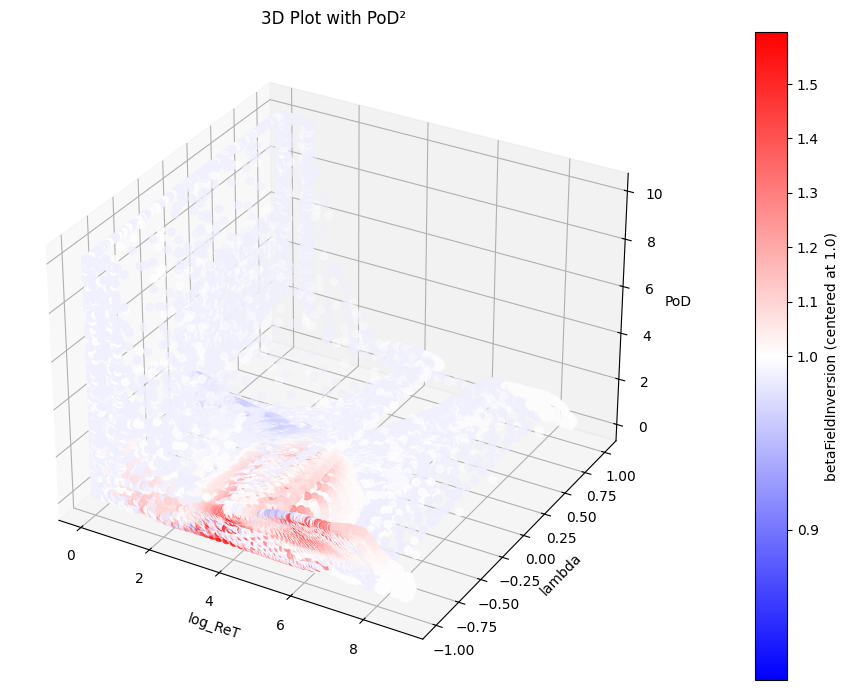

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# # === Load datasets ===
# paths = [
#     "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
# ]

frames = []
for path in paths:
    item = pd.read_csv(path)
    # Filter spatial bounds
    mask = (item['x'] >= -0.2) & (item['x'] <= 1.0) & (item['y'] >= -0.15) & (item['y'] <= 0.20)
    filtered = item[mask].copy()

    # Downsample near beta=1 region
    s1 = filtered[(filtered['betaFieldInversion'] < 0.995) | (filtered['betaFieldInversion'] > 1.005)]
    s2 = filtered[(filtered['betaFieldInversion'] >= 0.995) & (filtered['betaFieldInversion'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)
    frames.append(pd.concat([s1, s3], ignore_index=True))

# === Combine and transform ===
df = pd.concat(frames, ignore_index=True)
df["log_ReT"] = np.log1p(df["ReT"])
df['PoD2'] = df['PoD'] ** 5
df['lambda2'] = df['lambda'] ** 5
df['beta'] = df['betaFieldInversion']

# === Normalize for color scale centered at 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

# === Animation + save utility ===
def animate_and_save(x, y, z, xlabel, ylabel, zlabel, title, filename):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=df["beta"], cmap='bwr', norm=norm, s=30, edgecolors='face')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("betaFieldInversion (centered at 1.0)")

    def update(frame):
        ax.view_init(elev=30, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.tight_layout()
    plt.show()
    # ani.save(filename, writer='ffmpeg', dpi=200)
    # plt.close()

# === Create all three animations ===
animate_and_save(df["log_ReT"], df["lambda"], df["PoD"],
                 "log_ReT", "lambda", "PoD", "3D Plot with PoD²",
                 "/content/drive/MyDrive/NN_features_for_training/rotating_beta_PoD2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD"],
#                  "ReT", "lambda²", "PoD", "3D Plot with lambda²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD2"],
#                  "ReT", "lambda²", "PoD²", "3D Plot with lambda² and PoD²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2_PoD2.mp4")


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


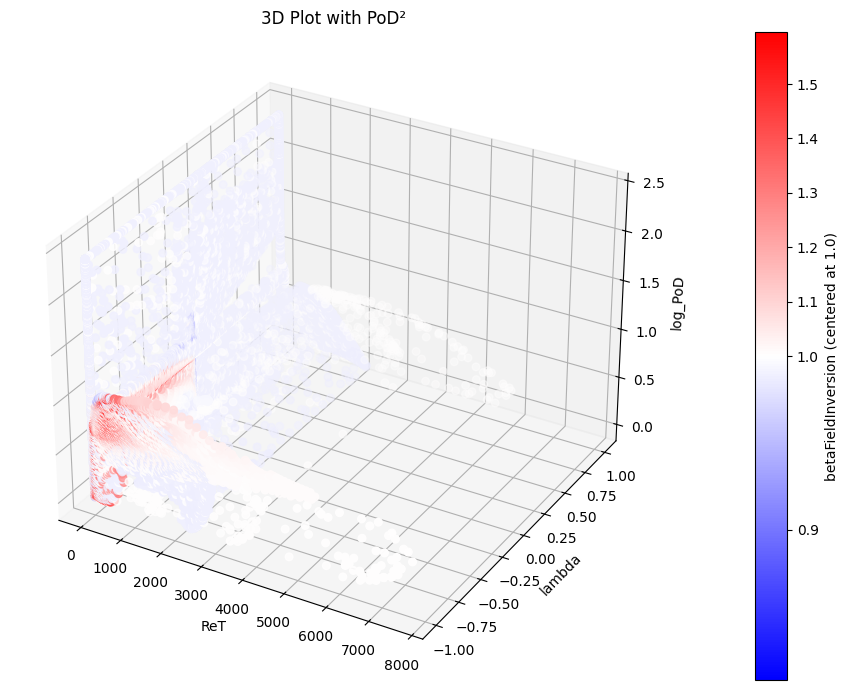

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# # === Load datasets ===
# paths = [
#     "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
# ]

frames = []
for path in paths:
    item = pd.read_csv(path)
    # Filter spatial bounds
    mask = (item['x'] >= -0.2) & (item['x'] <= 1.0) & (item['y'] >= -0.15) & (item['y'] <= 0.20)
    filtered = item[mask].copy()

    # Downsample near beta=1 region
    s1 = filtered[(filtered['betaFieldInversion'] < 0.995) | (filtered['betaFieldInversion'] > 1.005)]
    s2 = filtered[(filtered['betaFieldInversion'] >= 0.995) & (filtered['betaFieldInversion'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)
    frames.append(pd.concat([s1, s3], ignore_index=True))

# === Combine and transform ===
df = pd.concat(frames, ignore_index=True)
df["log_PoD"] = np.log1p(df["PoD"])
df['lambda2'] = df['lambda'] ** 5
df['beta'] = df['betaFieldInversion']

# === Normalize for color scale centered at 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

# === Animation + save utility ===
def animate_and_save(x, y, z, xlabel, ylabel, zlabel, title, filename):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=df["beta"], cmap='bwr', norm=norm, s=30, edgecolors='face')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("betaFieldInversion (centered at 1.0)")

    def update(frame):
        ax.view_init(elev=30, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.tight_layout()
    plt.show()
    # ani.save(filename, writer='ffmpeg', dpi=200)
    # plt.close()

# === Create all three animations ===
animate_and_save(df["ReT"], df["lambda"], df["log_PoD"],
                 "ReT", "lambda", "log_PoD", "3D Plot with PoD²",
                 "/content/drive/MyDrive/NN_features_for_training/rotating_beta_PoD2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD"],
#                  "ReT", "lambda²", "PoD", "3D Plot with lambda²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD2"],
#                  "ReT", "lambda²", "PoD²", "3D Plot with lambda² and PoD²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2_PoD2.mp4")

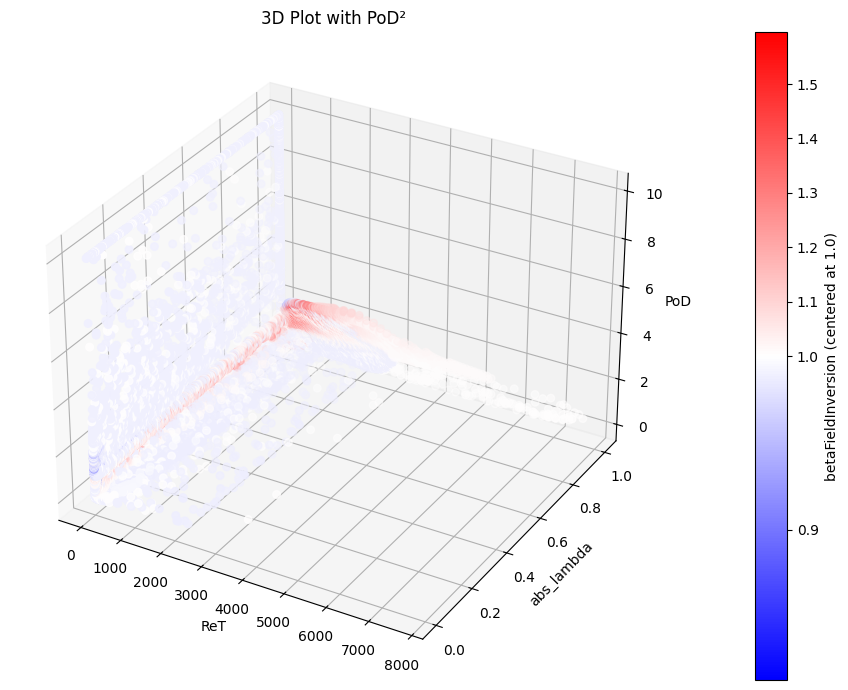

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# # === Load datasets ===
# paths = [
#     "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
# ]

frames = []
for path in paths:
    item = pd.read_csv(path)
    # Filter spatial bounds
    mask = (item['x'] >= -0.2) & (item['x'] <= 1.0) & (item['y'] >= -0.15) & (item['y'] <= 0.20)
    filtered = item[mask].copy()

    # Downsample near beta=1 region
    s1 = filtered[(filtered['betaFieldInversion'] < 0.995) | (filtered['betaFieldInversion'] > 1.005)]
    s2 = filtered[(filtered['betaFieldInversion'] >= 0.995) & (filtered['betaFieldInversion'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)
    frames.append(pd.concat([s1, s3], ignore_index=True))

# === Combine and transform ===
df = pd.concat(frames, ignore_index=True)
df["log_PoD"] = np.log1p(df["PoD"])
df['lambda2'] = df['lambda'] ** 5
df["abs_lambda"] = np.abs(df["lambda"])
df['beta'] = df['betaFieldInversion']

# === Normalize for color scale centered at 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

# === Animation + save utility ===
def animate_and_save(x, y, z, xlabel, ylabel, zlabel, title, filename):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=df["beta"], cmap='bwr', norm=norm, s=30, edgecolors='face')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("betaFieldInversion (centered at 1.0)")

    def update(frame):
        ax.view_init(elev=30, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.tight_layout()
    plt.show()
    # ani.save(filename, writer='ffmpeg', dpi=200)
    # plt.close()

# === Create all three animations ===
animate_and_save(df["ReT"], df["abs_lambda"], df["PoD"],
                 "ReT", "abs_lambda", "PoD", "3D Plot with PoD²",
                 "/content/drive/MyDrive/NN_features_for_training/rotating_beta_PoD2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD"],
#                  "ReT", "lambda²", "PoD", "3D Plot with lambda²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD2"],
#                  "ReT", "lambda²", "PoD²", "3D Plot with lambda² and PoD²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2_PoD2.mp4")

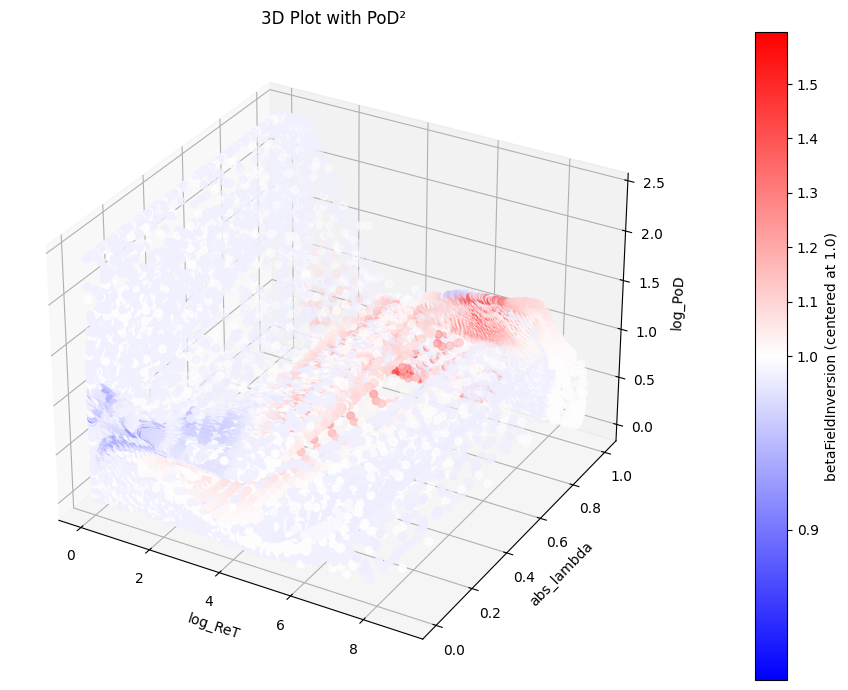

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# # === Load datasets ===
# paths = [
#     "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
# ]

frames = []
for path in paths:
    item = pd.read_csv(path)
    # Filter spatial bounds
    mask = (item['x'] >= -0.2) & (item['x'] <= 1.0) & (item['y'] >= -0.15) & (item['y'] <= 0.20)
    filtered = item[mask].copy()

    # Downsample near beta=1 region
    s1 = filtered[(filtered['betaFieldInversion'] < 0.995) | (filtered['betaFieldInversion'] > 1.005)]
    s2 = filtered[(filtered['betaFieldInversion'] >= 0.995) & (filtered['betaFieldInversion'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)
    frames.append(pd.concat([s1, s3], ignore_index=True))

# === Combine and transform ===
df = pd.concat(frames, ignore_index=True)
df["log_ReT"] = np.log1p(df["ReT"])
df["log_PoD"] = np.log1p(df["PoD"])
df['PoD2'] = df['PoD'] ** 2
df['lambda2'] = df['lambda'] ** 5
df["abs_lambda"] = np.abs(df["lambda"])
df['beta'] = df['betaFieldInversion']

# === Normalize for color scale centered at 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

# === Animation + save utility ===
def animate_and_save(x, y, z, xlabel, ylabel, zlabel, title, filename):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=df["beta"], cmap='bwr', norm=norm, s=30, edgecolors='face')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("betaFieldInversion (centered at 1.0)")

    def update(frame):
        ax.view_init(elev=30, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.tight_layout()
    plt.show()
    # ani.save(filename, writer='ffmpeg', dpi=200)
    # plt.close()

# === Create all three animations ===
animate_and_save(df["log_ReT"], df["abs_lambda"], df["log_PoD"],
                 "log_ReT", "abs_lambda", "log_PoD", "3D Plot with PoD²",
                 "/content/drive/MyDrive/NN_features_for_training/rotating_beta_PoD2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD"],
#                  "ReT", "lambda²", "PoD", "3D Plot with lambda²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD2"],
#                  "ReT", "lambda²", "PoD²", "3D Plot with lambda² and PoD²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2_PoD2.mp4")

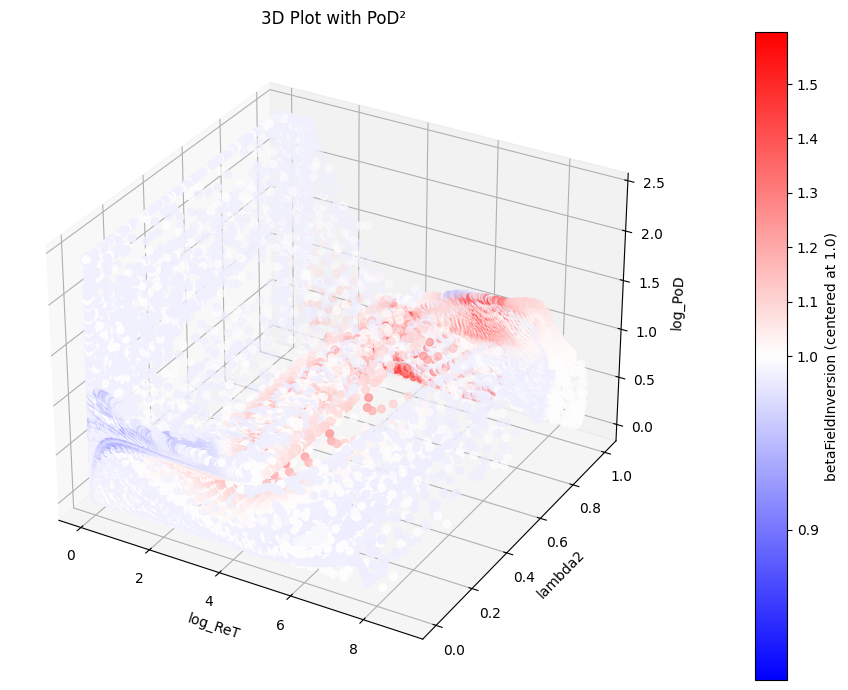

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.colors import TwoSlopeNorm

# # === Load datasets ===
# paths = [
#     "/content/drive/MyDrive/NN_features_for_training/features_10.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_14.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_15.2.csv",
#     "/content/drive/MyDrive/NN_features_for_training/features_20.1.csv"
# ]

frames = []
for path in paths:
    item = pd.read_csv(path)
    # Filter spatial bounds
    mask = (item['x'] >= -0.2) & (item['x'] <= 1.0) & (item['y'] >= -0.15) & (item['y'] <= 0.20)
    filtered = item[mask].copy()

    # Downsample near beta=1 region
    s1 = filtered[(filtered['betaFieldInversion'] < 0.995) | (filtered['betaFieldInversion'] > 1.005)]
    s2 = filtered[(filtered['betaFieldInversion'] >= 0.995) & (filtered['betaFieldInversion'] <= 1.005)]
    s3 = s2.sample(frac=0.05, random_state=1)
    frames.append(pd.concat([s1, s3], ignore_index=True))

# === Combine and transform ===
df = pd.concat(frames, ignore_index=True)
df["log_ReT"] = np.log1p(df["ReT"])
df["log_PoD"] = np.log1p(df["PoD"])

df['PoD2'] = df['PoD'] ** 2
df['lambda2'] = df['lambda'] ** 2
df["abs_lambda"] = np.abs(df["lambda"])
df['beta'] = df['betaFieldInversion']

# === Normalize for color scale centered at 1.0 ===
norm = TwoSlopeNorm(vcenter=1.0, vmin=df["beta"].min(), vmax=df["beta"].max())

# === Animation + save utility ===
def animate_and_save(x, y, z, xlabel, ylabel, zlabel, title, filename):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=df["beta"], cmap='bwr', norm=norm, s=30, edgecolors='face')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    cbar = plt.colorbar(sc, pad=0.1)
    cbar.set_label("betaFieldInversion (centered at 1.0)")

    def update(frame):
        ax.view_init(elev=30, azim=frame)

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.tight_layout()
    plt.show()
    # ani.save(filename, writer='ffmpeg', dpi=200)
    # plt.close()

# === Create all three animations ===
animate_and_save(df["log_ReT"], df["lambda2"], df["log_PoD"],
                 "log_ReT", "lambda2", "log_PoD", "3D Plot with PoD²",
                 "/content/drive/MyDrive/NN_features_for_training/rotating_beta_PoD2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD"],
#                  "ReT", "lambda²", "PoD", "3D Plot with lambda²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2.mp4")

# animate_and_save(df["ReT"], df["lambda2"], df["PoD2"],
#                  "ReT", "lambda²", "PoD²", "3D Plot with lambda² and PoD²",
#                  "/content/drive/MyDrive/NN_features_for_training/rotating_beta_lambda2_PoD2.mp4")